<a href="https://colab.research.google.com/github/2403a52029-lab/NLP_LAB-ASSIGNMENTS/blob/main/NLP_LAB_04_2403A52029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd # Import pandas for data manipulation
import re # Import re for regular expressions
import nltk # Import nltk for natural language processing tasks
import spacy # Import spacy for advanced NLP tasks (though not explicitly used in later cells, it was imported initially)
import matplotlib.pyplot as plt # Import matplotlib for plotting and visualizations
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer for converting text to numerical TF-IDF features
from wordcloud import WordCloud # Import WordCloud for generating word cloud visualizations

In [17]:
df = pd.read_csv("/content/Tweets.csv.zip")   # Load the dataset from the CSV file into a pandas DataFrame
df = df[['text', 'airline_sentiment']] # Select only the 'text' and 'airline_sentiment' columns
df.head() # Display the first 5 rows of the DataFrame

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [18]:
nltk.download('stopwords') # Download the NLTK stopwords corpus
nltk.download('punkt') # Download the NLTK Punkt tokenizer models
nltk.download('punkt_tab') # Download the NLTK Punkt tokenizer models (specifically the 'punkt_tab' resource for better tokenization of specific texts)
from nltk.corpus import stopwords # Import stopwords from NLTK
from nltk.tokenize import word_tokenize # Import word_tokenize for splitting text into words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
stop_words = set(stopwords.words('english')) # Create a set of English stop words for faster lookup

def clean_text(text): # Define a function to clean the text
    text = re.sub(r"http\S+", "", text)      # Remove URLs from the text
    text = re.sub(r"@\w+", "", text)          # Remove mentions (e.g., @username) from the text
    text = re.sub(r"#\w+", "", text)          # Remove hashtags (e.g., #hashtag) from the text
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # Remove special characters (keep only letters and spaces)
    text = text.lower() # Convert the text to lowercase

    tokens = word_tokenize(text) # Tokenize the text into individual words
    tokens = [word for word in tokens if word not in stop_words] # Remove stop words from the tokens

    return " ".join(tokens) # Join the cleaned tokens back into a single string

In [20]:
df['cleaned_text'] = df['text'].apply(clean_text) # Apply the clean_text function to the 'text' column and store results in a new 'cleaned_text' column
df.head() # Display the first 5 rows with the new 'cleaned_text' column

,text,airline_sentiment,cleaned_text
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


In [21]:
negative_tweets = df[df['airline_sentiment'] == 'negative'] # Filter the DataFrame to get only tweets with 'negative' sentiment
negative_corpus = negative_tweets['cleaned_text'].tolist() # Convert the 'cleaned_text' of negative tweets into a list of strings (corpus)

In [22]:
vectorizer = TfidfVectorizer(max_features=20) # Initialize TF-IDF Vectorizer to extract up to 20 features (terms)
tfidf_matrix = vectorizer.fit_transform(negative_corpus) # Fit the vectorizer to the negative tweets corpus and transform it into a TF-IDF matrix

tfidf_df = pd.DataFrame( # Create a DataFrame from the TF-IDF matrix
    tfidf_matrix.toarray(), # Convert the sparse matrix to a dense NumPy array
    columns=vectorizer.get_feature_names_out() # Use the feature names (words) as column headers
) # Create a DataFrame to display the TF-IDF scores

tfidf_df.head() # Display the first 5 rows of the TF-IDF DataFrame

,amp,call,cancelled,cant,customer,delayed,flight,flightled,get,help,hold,hour,hours,im,one,plane,service,still,time,us
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
top_terms = tfidf_df.mean().sort_values(ascending=False) # Calculate the mean TF-IDF score for each term and sort them in descending order
top_terms # Display the top terms and their average TF-IDF scores

,0
flight,0.161364
get,0.068515
cancelled,0.053937
service,0.052331
time,0.044687
hours,0.044553
help,0.043687
im,0.042881
customer,0.042700
hold,0.040962


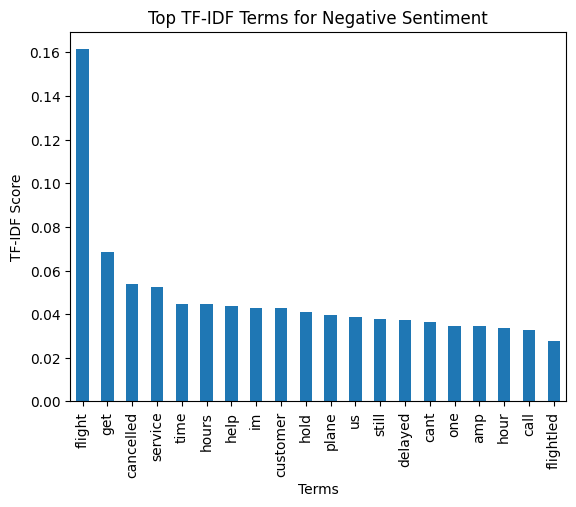

In [24]:
plt.figure() # Create a new figure for the plot
top_terms.plot(kind='bar') # Plot the top terms as a bar chart
plt.title("Top TF-IDF Terms for Negative Sentiment") # Set the title of the plot
plt.ylabel("TF-IDF Score") # Set the label for the y-axis
plt.xlabel("Terms") # Set the label for the x-axis
plt.show() # Display the plot

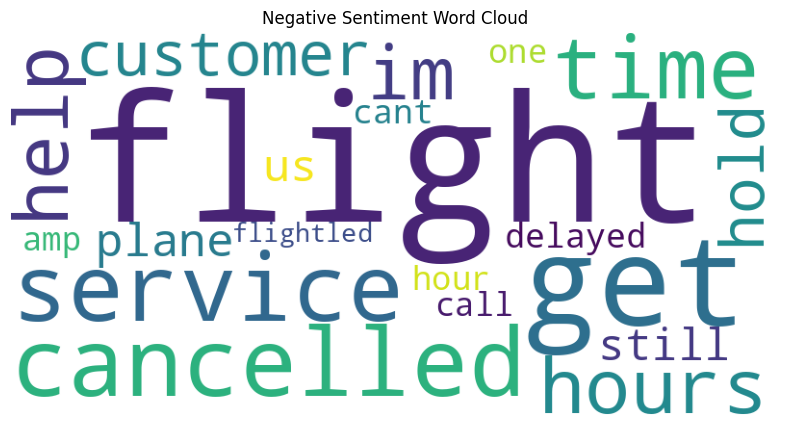

In [25]:
wordcloud = WordCloud( # Initialize the WordCloud object
    width=800, # Set the width of the word cloud image
    height=400, # Set the height of the word cloud image
    background_color='white' # Set the background color to white
).generate_from_frequencies(top_terms) # Generate the word cloud from the frequencies of the top terms

plt.figure(figsize=(10,5)) # Create a new figure with a specified size for the word cloud
plt.imshow(wordcloud) # Display the generated word cloud image
plt.axis('off') # Turn off the axes for a cleaner look
plt.title("Negative Sentiment Word Cloud") # Set the title of the word cloud
plt.show() # Display the word cloud